## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0   9.513651   700.516957  0.879066   8.774840   615.809980
1   1.096206   825.833495  0.692064  10.275318   571.346164
2   7.502607  1116.867025  0.442231   8.246463   494.075670
3  50.177301  1615.948056  0.781908   1.900275  1264.387075
4  92.138737   821.674385  0.786700   9.686790   652.932864


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9306175	total: 57.6ms	remaining: 57.5s
1:	learn: 0.9211178	total: 58ms	remaining: 29s
2:	learn: 0.9114698	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9028806	total: 59.3ms	remaining: 14.8s
4:	learn: 0.8908620	total: 59.8ms	remaining: 11.9s
5:	learn: 0.8820477	total: 60.4ms	remaining: 10s
6:	learn: 0.8707509	total: 61.2ms	remaining: 8.68s
7:	learn: 0.8605687	total: 61.9ms	remaining: 7.67s
8:	learn: 0.8508835	total: 62.4ms	remaining: 6.87s
9:	learn: 0.8374559	total: 62.9ms	remaining: 6.22s
10:	learn: 0.8279032	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8163547	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8065533	total: 64.5ms	remaining: 4.9s
13:	learn: 0.7952318	total: 65.1ms	remaining: 4.58s
14:	learn: 0.7846210	total: 65.5ms	remaining: 4.3s
15:	learn: 0.7749214	total: 65.9ms	remaining: 4.05s
16:	learn: 0.7659053	total: 66.3ms	remaining: 3.84s
17:	learn: 0.7564137	total: 66.8ms	remaining: 3.64s
18:	learn: 0.7497831	total: 67.2ms	remaining: 3.47s


92:	learn: 0.3184844	total: 101ms	remaining: 983ms
93:	learn: 0.3147850	total: 101ms	remaining: 976ms
94:	learn: 0.3106671	total: 102ms	remaining: 971ms
95:	learn: 0.3078374	total: 102ms	remaining: 964ms
96:	learn: 0.3042505	total: 103ms	remaining: 957ms
97:	learn: 0.3015683	total: 103ms	remaining: 950ms
98:	learn: 0.2976351	total: 104ms	remaining: 943ms
99:	learn: 0.2936566	total: 104ms	remaining: 936ms
100:	learn: 0.2908685	total: 105ms	remaining: 931ms
101:	learn: 0.2876418	total: 105ms	remaining: 924ms
102:	learn: 0.2845448	total: 105ms	remaining: 918ms
103:	learn: 0.2815085	total: 106ms	remaining: 911ms
104:	learn: 0.2780350	total: 106ms	remaining: 904ms
105:	learn: 0.2753961	total: 106ms	remaining: 898ms
106:	learn: 0.2728005	total: 107ms	remaining: 892ms
107:	learn: 0.2700650	total: 107ms	remaining: 886ms
108:	learn: 0.2677692	total: 108ms	remaining: 881ms
109:	learn: 0.2646656	total: 108ms	remaining: 876ms
110:	learn: 0.2612166	total: 109ms	remaining: 869ms
111:	learn: 0.258672

266:	learn: 0.0652463	total: 185ms	remaining: 507ms
267:	learn: 0.0648067	total: 185ms	remaining: 506ms
268:	learn: 0.0643743	total: 186ms	remaining: 505ms
269:	learn: 0.0639505	total: 186ms	remaining: 503ms
270:	learn: 0.0635431	total: 187ms	remaining: 502ms
271:	learn: 0.0630686	total: 187ms	remaining: 501ms
272:	learn: 0.0625476	total: 188ms	remaining: 500ms
273:	learn: 0.0621702	total: 188ms	remaining: 499ms
274:	learn: 0.0617946	total: 189ms	remaining: 497ms
275:	learn: 0.0612833	total: 189ms	remaining: 496ms
276:	learn: 0.0608366	total: 190ms	remaining: 495ms
277:	learn: 0.0604301	total: 190ms	remaining: 494ms
278:	learn: 0.0599997	total: 191ms	remaining: 493ms
279:	learn: 0.0596296	total: 191ms	remaining: 492ms
280:	learn: 0.0592185	total: 192ms	remaining: 491ms
281:	learn: 0.0588111	total: 192ms	remaining: 489ms
282:	learn: 0.0584768	total: 193ms	remaining: 488ms
283:	learn: 0.0580385	total: 193ms	remaining: 486ms
284:	learn: 0.0576658	total: 194ms	remaining: 486ms
285:	learn: 

463:	learn: 0.0219246	total: 280ms	remaining: 324ms
464:	learn: 0.0218212	total: 281ms	remaining: 323ms
465:	learn: 0.0217288	total: 281ms	remaining: 322ms
466:	learn: 0.0216229	total: 282ms	remaining: 322ms
467:	learn: 0.0214967	total: 282ms	remaining: 321ms
468:	learn: 0.0213940	total: 283ms	remaining: 320ms
469:	learn: 0.0212442	total: 283ms	remaining: 319ms
470:	learn: 0.0211521	total: 284ms	remaining: 319ms
471:	learn: 0.0210916	total: 284ms	remaining: 318ms
472:	learn: 0.0209917	total: 285ms	remaining: 317ms
473:	learn: 0.0208715	total: 285ms	remaining: 317ms
474:	learn: 0.0207528	total: 286ms	remaining: 316ms
475:	learn: 0.0206939	total: 286ms	remaining: 315ms
476:	learn: 0.0205981	total: 287ms	remaining: 314ms
477:	learn: 0.0205026	total: 287ms	remaining: 314ms
478:	learn: 0.0204001	total: 288ms	remaining: 313ms
479:	learn: 0.0203431	total: 288ms	remaining: 312ms
480:	learn: 0.0202497	total: 289ms	remaining: 312ms
481:	learn: 0.0201497	total: 290ms	remaining: 311ms
482:	learn: 

622:	learn: 0.0109860	total: 363ms	remaining: 220ms
623:	learn: 0.0109421	total: 364ms	remaining: 219ms
624:	learn: 0.0108959	total: 364ms	remaining: 219ms
625:	learn: 0.0108543	total: 365ms	remaining: 218ms
626:	learn: 0.0108097	total: 365ms	remaining: 217ms
627:	learn: 0.0107671	total: 366ms	remaining: 217ms
628:	learn: 0.0107218	total: 366ms	remaining: 216ms
629:	learn: 0.0106812	total: 367ms	remaining: 215ms
630:	learn: 0.0106372	total: 367ms	remaining: 215ms
631:	learn: 0.0105936	total: 368ms	remaining: 214ms
632:	learn: 0.0105509	total: 368ms	remaining: 213ms
633:	learn: 0.0105091	total: 369ms	remaining: 213ms
634:	learn: 0.0104681	total: 369ms	remaining: 212ms
635:	learn: 0.0104356	total: 370ms	remaining: 211ms
636:	learn: 0.0103875	total: 370ms	remaining: 211ms
637:	learn: 0.0103402	total: 370ms	remaining: 210ms
638:	learn: 0.0102990	total: 371ms	remaining: 210ms
639:	learn: 0.0102587	total: 371ms	remaining: 209ms
640:	learn: 0.0102192	total: 372ms	remaining: 208ms
641:	learn: 

802:	learn: 0.0057996	total: 457ms	remaining: 112ms
803:	learn: 0.0057780	total: 457ms	remaining: 111ms
804:	learn: 0.0057519	total: 458ms	remaining: 111ms
805:	learn: 0.0057154	total: 458ms	remaining: 110ms
806:	learn: 0.0057024	total: 459ms	remaining: 110ms
807:	learn: 0.0056874	total: 459ms	remaining: 109ms
808:	learn: 0.0056653	total: 460ms	remaining: 109ms
809:	learn: 0.0056466	total: 461ms	remaining: 108ms
810:	learn: 0.0056251	total: 461ms	remaining: 107ms
811:	learn: 0.0056070	total: 462ms	remaining: 107ms
812:	learn: 0.0055860	total: 462ms	remaining: 106ms
813:	learn: 0.0055725	total: 463ms	remaining: 106ms
814:	learn: 0.0055573	total: 463ms	remaining: 105ms
815:	learn: 0.0055227	total: 464ms	remaining: 105ms
816:	learn: 0.0055036	total: 464ms	remaining: 104ms
817:	learn: 0.0054845	total: 465ms	remaining: 103ms
818:	learn: 0.0054674	total: 466ms	remaining: 103ms
819:	learn: 0.0054452	total: 466ms	remaining: 102ms
820:	learn: 0.0054286	total: 467ms	remaining: 102ms
821:	learn: 

953:	learn: 0.0036333	total: 539ms	remaining: 26ms
954:	learn: 0.0036186	total: 540ms	remaining: 25.4ms
955:	learn: 0.0036124	total: 540ms	remaining: 24.9ms
956:	learn: 0.0035996	total: 541ms	remaining: 24.3ms
957:	learn: 0.0035920	total: 541ms	remaining: 23.7ms
958:	learn: 0.0035804	total: 542ms	remaining: 23.2ms
959:	learn: 0.0035664	total: 543ms	remaining: 22.6ms
960:	learn: 0.0035592	total: 543ms	remaining: 22ms
961:	learn: 0.0035546	total: 544ms	remaining: 21.5ms
962:	learn: 0.0035427	total: 544ms	remaining: 20.9ms
963:	learn: 0.0035289	total: 545ms	remaining: 20.3ms
964:	learn: 0.0035165	total: 545ms	remaining: 19.8ms
965:	learn: 0.0035030	total: 546ms	remaining: 19.2ms
966:	learn: 0.0034967	total: 546ms	remaining: 18.6ms
967:	learn: 0.0034894	total: 547ms	remaining: 18.1ms
968:	learn: 0.0034801	total: 547ms	remaining: 17.5ms
969:	learn: 0.0034688	total: 548ms	remaining: 16.9ms
970:	learn: 0.0034554	total: 548ms	remaining: 16.4ms
971:	learn: 0.0034463	total: 549ms	remaining: 15.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


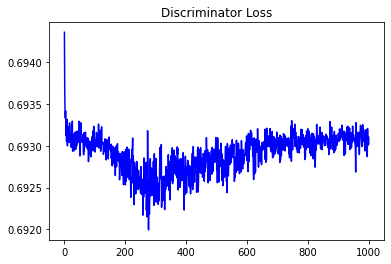

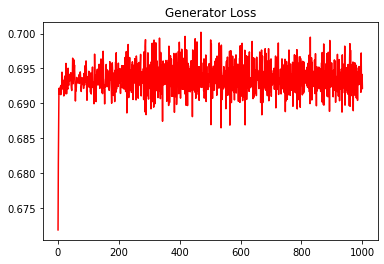

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04398540804251444


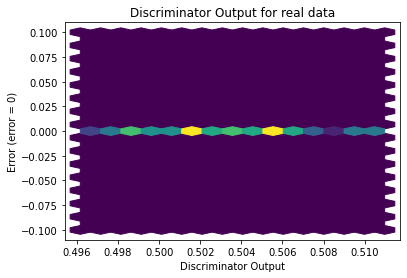

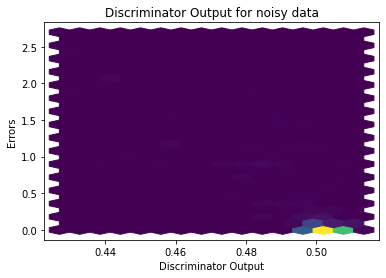

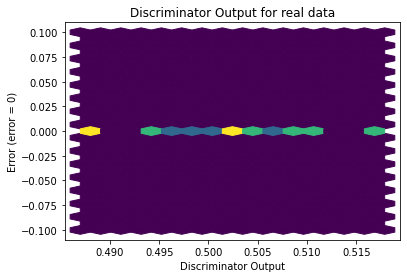

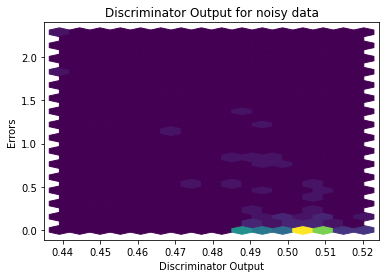

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1699]], requires_grad=True)
